## Homework 02 | WEEK 02 (13.09-19.09.2022) | Machine Learning Zoomcamp



In this homework, we use the California Housing Prices. Data is taken from [kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download). 

[Link to the Homework](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md)

[Link to the submission form for the homework](https://forms.gle/WCVb4KMNsgbkuJtr6)

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# above line is needed so that all the plots can be displayed on notebook

In [3]:
#data='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [4]:
#!wget $data

## Exploratory Data Analysis (EDA)

* Load the data

* Look at the `'median_house_value'` variable. Does it have a long tail?

In [5]:
ls

HomeWork02-Q1-4.ipynb  HomeWork02-Q5.ipynb  HomeWork02-Q6.ipynb  housing.csv


In [6]:
df = pd.read_csv('housing.csv') #housing.csv is already downloaded on my local directory

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.shape

(20640, 10)

In [9]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

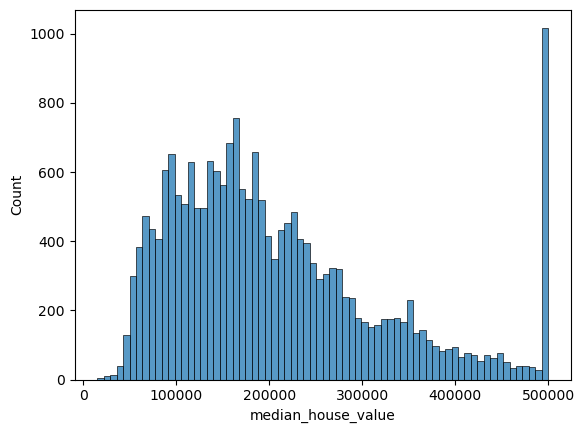

In [11]:
sns.histplot(df.median_house_value, bins=70)

In the above figure we see that feature or, variable `median_house_value` has little bit of long tail, but it is not such a strong tail as in our car price prediction project done in videos of module WK02. It looks rather like a skewed normal distribution. Let us also look at how the logarithmic distribution looks like.

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

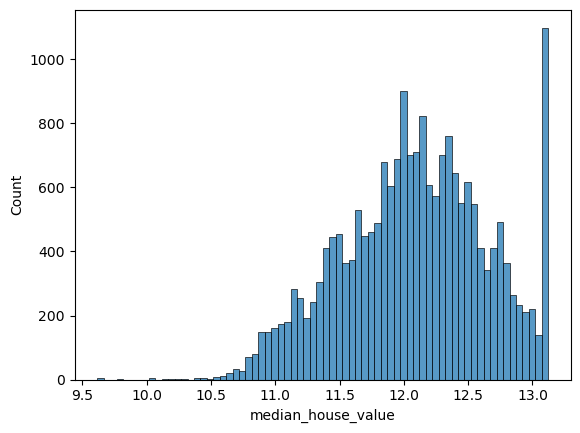

In [12]:
house_value_logs= np.log1p(df.median_house_value)
sns.histplot(house_value_logs, bins=70)

## Features

For the rest of the homework, we'll need to use only following features or, columns:

* `'longitude'`

* `'latitude'`

* `'housing_median_age'`

* `'total_rooms'`

* `'total_bedrooms'`

* `'population'`

* `'households'`

* `'median_income'`

* `'median_house_value'`

We will select only the above features and will throw the `'ocean_proximity'` away. 

In [13]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [14]:
df=df[features]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


***
### Question 1: 

Find a feature with missing values. How many missing values does it have?

* 207
* 307
* 408
* 508

In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer to Question 1:** <br>
A feature with missing values is 'total_bedrooms' and it has 207 missing values.



***

### Question 2: 
What's the median (50% percentile) for variable 'population'?

* 1133
* 1122
* 1166
* 1188

In [16]:
df['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [17]:
df['population'].median()

1166.0

**Answer to Question 2:** <br>
The median (50% percentile) for variable 'population' is 1166

***

#### Split the data

* Shuffle the initial dataset, use seed 42.

* Split your data in train/val/test sets, with 60%/20%/20% distribution.

* Make sure that the target value ('median_house_value') is not in your dataframe.

* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [18]:
n = len(df)
n

20640

In [19]:
n_val = int(n*0.2)  # n_val is length of validation data set
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [20]:
n, n_val+n_test+n_train

(20640, 20640)

In [21]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [22]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [23]:
np.random.seed(42)  #so that result is reproducible
np.random.shuffle(idx)

In [24]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [25]:
df.iloc[idx[:10]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0
7113,-118.02,33.89,36.0,1375.0,NaN,670.0,221.0,5.0839,198200.0
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0
18246,-122.08,37.39,4.0,2292.0,NaN,1050.0,584.0,4.8036,340000.0
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0


In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [28]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [31]:
y_train = np.log1p(df_train.median_house_value.values) #.values gives numpy array instead of pandas series directly
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [32]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [33]:
del df_train['median_house_value']  #we should delete them, because we accidentaly might use it.
del df_val['median_house_value']
del df_test['median_house_value']

In [34]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806


In [35]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

***

### Question number  3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:
* With 0
* With mean
* Both are equally good

In [36]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [37]:
def rmse(y, y_pred):
    se = (y - y_pred)**2  #squared error
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [38]:
zero   = 0.0
mean   = df_train['total_bedrooms'].mean()
median = df_train['total_bedrooms'].median()
mode   = df_train['total_bedrooms'].mode() #as per Q, we have to train model with 0, mean and mode

zero, mean

(0.0, 533.4803317730147)

In [39]:
df_train['total_bedrooms'].describe()

count    12177.000000
mean       533.480332
std        422.223754
min          2.000000
25%        295.000000
50%        431.000000
75%        641.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [40]:
for fill in [mean, zero]: 
    df_train.fillna(fill, inplace = True)
    X_train = df_train.values
    w0, w = train_linear_regression(X_train,y_train)
    y_pred_train = w0 + X_train.dot(w)
    score_train = rmse(y_train, y_pred_train)
    
    X_val = df_val.values
    y_pred_val = w0 + X_val.dot(w)
    score_val = rmse(y_val, y_pred_val)
    print(round(fill,1), score_train, score_val)

533.5 0.34 0.33
0.0 0.34 0.33


We have rmse = 0.34 with training data set and we had rmse=0.33 with validation data set. They are quite similar. Therefore, we acccept this model and its prediction as not a matter of luck.

**Answer to question number 3** <br>

Zero and mean: both are equally good

***

### Question numebr 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

NAs are already filled with zeros, because zero was the last in the loop. 

In [41]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [42]:
def train_linear_regression_reg(X,y,r = 0.0): #reg stands for relularized. r is regularization parameter.
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [43]:
w0, w = train_linear_regression_reg(X_train,y_train, r=0.01)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.33

In [44]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:      
    w0, w = train_linear_regression_reg(X_train,y_train, r=r)    
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0 -11.759590872584168 0.33
1e-06 -11.759574680156579 0.33
0.0001 -11.757971849061313 0.33
0.001 -11.743420667125623 0.33
0.01 -11.59986502323834 0.33
0.1 -10.336279128799955 0.33
1 -4.946335110730481 0.33
5 -1.4891723786117694 0.34
10 -0.7936332757556699 0.34


Smallest rmse we get is 0.33. We get it for first 6 r values. As instructed in the question:

**answer to question number 4 is :** 0

***